# Classification Trees in Python



Using **scikit-learn** and **Cost Complexity Pruning** to build this **Classification Tree** (below), which uses the **[UCI Machine Learning Repository]** data (https://archive.ics.uci.edu/ml/index.php) to predict whether or not a patient has **[heart disease]**:

<img src="tree.png" alt="A Classification Tree" style="width: 600px;">

<!-- The **Classification Tree** will use continuous and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**
 -->
 
<!-- If you are not already familiary with these terms, check out the **StatQuests:** **[Decision Trees Part 1: Building and Using](https://youtu.be/7VeUPuFGJHk)**, **[Part 2: Feature Selection and Missing Data](https://youtu.be/wpNl-JwwplA)** and **[How to Prune Regression Trees](https://youtu.be/D0efHEJsfHo)**. -->



# **Machine Learning at Flatiron Data Science Bootcamp** 
- **Phase 1. Data Engineering Python, Pandas, SQL**
    - Acquiring & cleaning data, missing values, outliers
    - Basic data analysis, data visualization
    
- **Phase 2. Foundation of Statistical Analysis**
    - Predictive & Inferential statistics
    - Hypothesis testing, linear regression
    
- **Phase 3. Building Machine Learning Models**
    - large data sets to build classification engines, supervised learning
    - non-parametric algorithms- kNN, SVM, classification & regression tree 



# **Machine Learning at Flatiron Data Science Bootcamp** 
- **Phase 4. Advanced Topics**
    - Time Series, Clustering, Rec Systems, Deep Learning & NLP
    - unsupervised techniques, recommender systems, sentiment analysis, ANN

- **Phase 5. Capstone**
    - gathers, explores their own big data, build statistical or ML models 
    - communicate findings w/ data visualization & storytelling techniques


**Classification Trees** are useful machine learning models when you need to to know how the decisions are being made and each step in the decision making process is easy to understand.

In this lesson you will learn about...

- **1. [Importing Data](#download-the-data)**

- **2. [Data Exploration](#identify-and-deal-with-missing-data)**
    - Identifying Missing Data
    - Basic Descriptive Statistics
    - univariate & bivariate analysis

- **3. [Modelling: Formatting the Data for Decision Trees](#format-the-data)**
    - Splitting data into Dependent and Independent Variables
    - One-Hot-Encoding
    - Building a Preliminary Classification Tree

- **5. [Optimzing the tree with Cost Complexity Pruning](#prune-tree)**
    - Visualizing Alpha
    - Using Cross Validation to find the best value for Alpha


- **6. [Building, Drawing, Interpreting and Evaluating the Final Classification Tree](#draw-tree)**


# 1. Import the modules that will do all the work
- The very first thing we do is load in a bunch of python modules. 
- Python, itself, just gives us a basic programming language. 
- These modules give us extra functionality to import the data, clean, and format 
- Other modules then build, evaluate, and draw the classification tree. 


# 1.1 Importing the modules

NOTE: You will need Python 3 and have at least these versions for each of the following modules: pandas:0.25.1, numpy:1.17.2, sklearn:0.22.1

If you installed Python 3 with Anaconda, you can check which version you have with the command: conda list. Run conda update --all to update your version..

In [ ]:
import graphviz

In [6]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn import tree


# 2. Importing the data as Pandas DataFrame
Now we load **[Heart Disease Dataset]** in a dataset from the UCI Machine Learning Repository. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

In [ ]:
## load the file into your notebook
df = pd.read_csv('processed.cleveland.data', header=None)

# 3. Inspecting the DataFrame

In [ ]:
## display the first 5 rows
df.head(5)

In [ ]:
df.info()

## 4.1 Add column names

## The names of column names to format the data:
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [ ]:
## create a list of the column names and add to the DataFrame
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
## display the first 5 rows (including the column names)
df.head()

In [ ]:
## dtypes tell us the "data type" for each column
df.dtypes

In [4]:
df.info()

NameError: name 'df' is not defined

In [3]:
df['hd'].value_counts()

NameError: name 'df' is not defined

In [12]:
df.groupby('sex').mean()

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
sex,,,,,,,,,,,
0.0,55.721649,3.144330,133.340206,261.752577,0.123711,0.958763,151.226804,0.226804,0.867010,1.567010,0.536082
1.0,53.834951,3.165049,130.912621,239.601942,0.160194,1.004854,148.844660,0.373786,1.120874,1.616505,1.126214


# 4.2 Cleaning Data- missing values
The biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. 

1. Dealing with missing data.
2. Dealing with outliers

**Missing Data** - **NA**
> - We can **delete** the rows that contain missing data. This is relatively easy to do, with `dropna()`
> - We can **impute** the values that are missing with mean, median, mode, etc.


In [13]:
## display the unique values in the column called 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [15]:
## print out unique values in the column called 'thal'
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [16]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

## 1.2 Dealing With Missing Data

Since scikit-learn's classification trees do not support datasets with missing values, we need to figure out what to do these question marks. We can either delete these patients from the training dataset, or impute values for the missing data. First let's see how many rows contain missing values.

In [17]:
## and so we say we want any row with '?' in column 'ca' OR any row with '?' in column 'thal'
len(df.loc[(df['ca'] == '?') 
           | 
           (df['thal'] == '?')])

6

In [18]:
## print out the rows that contain missing values.
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [19]:
df.shape

(303, 14)

So 6 of the **303** rows, or **2%**, contain missing values. Since **303 - 6 = 297**, and **297** 

**NOTE:** Imputing missing values is a big topic that we will tackle in another webinar. By taking the "easy" route by just deleting rows with missing values, we can stay focused on **Decision Trees**.  

In [21]:
## use loc[] to select all rows that do not contain missing values
df1 = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [22]:
len(df1)

297

In [23]:
df1['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [24]:
df1['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [25]:
df1

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [27]:
df1.hd = df1.hd.replace([2,3,4], 1)

/Users/uohnathiessen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df1['hd'].value_counts()

0    160
1    137
Name: hd, dtype: int64

<AxesSubplot:>

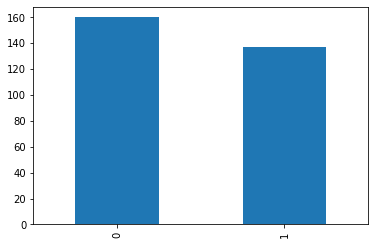

In [29]:
df1['hd'].value_counts().plot.bar()

In [30]:
df1.hd = df1.hd.astype('category')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      297 non-null    float64 
 1   sex      297 non-null    float64 
 2   cp       297 non-null    float64 
 3   restbp   297 non-null    float64 
 4   chol     297 non-null    float64 
 5   fbs      297 non-null    float64 
 6   restecg  297 non-null    float64 
 7   thalach  297 non-null    float64 
 8   exang    297 non-null    float64 
 9   oldpeak  297 non-null    float64 
 10  slope    297 non-null    float64 
 11  ca       297 non-null    object  
 12  thal     297 non-null    object  
 13  hd       297 non-null    category
dtypes: category(1), float64(11), object(2)
memory usage: 32.9+ KB


<AxesSubplot:xlabel='hd', ylabel='count'>

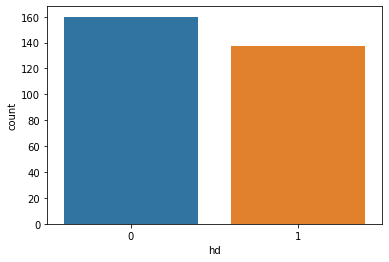

In [32]:
sns.countplot(x='hd',data=df1)

In [ ]:
df1['hd'].value_counts()

In [33]:
df1.groupby('sex').mean()

,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope
sex,,,,,,,,,,
0.0,55.750000,3.145833,133.395833,262.229167,0.125000,0.947917,151.604167,0.229167,0.876042,1.572917
1.0,53.965174,3.164179,130.880597,240.243781,0.154229,1.019900,148.641791,0.373134,1.141294,1.616915


<AxesSubplot:xlabel='sex', ylabel='count'>

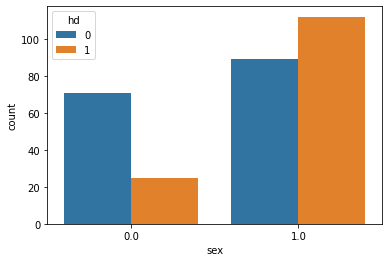

In [34]:
sns.countplot(x='sex',hue='hd',data=df1)

# 5. Explore the data (Exploratoray Data Analysis)

In [36]:
df.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
restbp,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


In [35]:
df1.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079
restbp,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037


<AxesSubplot:>

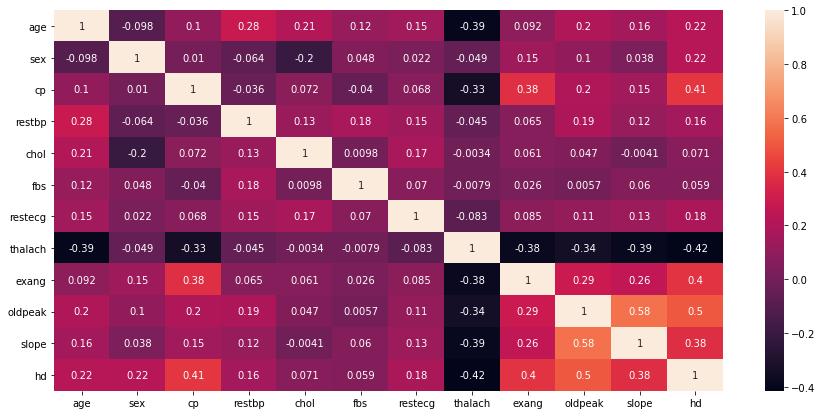

In [37]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True)

## 5.1 Feature Selection

In [38]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'],
      dtype='object')

In [50]:
df_sel = df1[['thalach','exang', 'oldpeak', 'slope', 'hd']]

In [54]:
df_sel.corr()

,thalach,exang,oldpeak,slope
thalach,1.000000,-0.384368,-0.347640,-0.389307
exang,-0.384368,1.000000,0.289310,0.250572
oldpeak,-0.347640,0.289310,1.000000,0.579037
slope,-0.389307,0.250572,0.579037,1.000000


<AxesSubplot:>

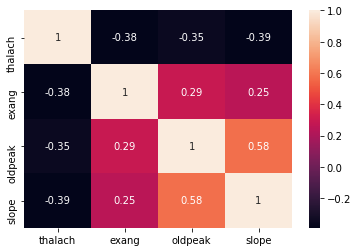

In [55]:
sns.heatmap(df_sel.corr(), annot=True)

In [45]:
df1_sel = df1[['thalach','exang', 'oldpeak', 'slope', 'hd']]

## Distribution of the Numerical Features

In [57]:
age_series = df['age']

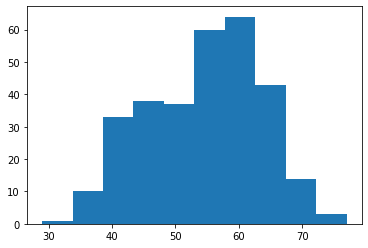

In [58]:
plt.hist(age_series)
plt.show()

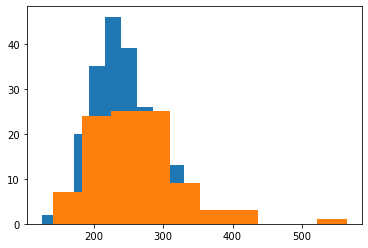

In [59]:
plt.hist(df.loc[df['sex'] == 1.0]['chol'], label="Male")
plt.hist(df.loc[df['sex'] == 0.0]['chol'], label="Female")
plt.show()

In [ ]:
Y = ax1 + bx2 + cx3

In [60]:
X = df_sel.drop(columns='hd')
y = df_sel['hd']

In [61]:
X1 = df_sel[['slope','thalach','exang']]

In [62]:
X1

,slope,thalach,exang
0,3.0,150.0,0.0
1,2.0,108.0,1.0
2,2.0,129.0,1.0
3,3.0,187.0,0.0
4,1.0,172.0,0.0
...,...,...,...
297,2.0,123.0,1.0
298,2.0,132.0,0.0
299,2.0,141.0,0.0
300,2.0,115.0,1.0


In [63]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: category
Categories (2, int64): [0, 1]

In [64]:
## split the data into training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [65]:
# perform training with giniIndex
# create the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# fit the model 
clf_gini.fit(X1_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [66]:
# Function to make predictions 
def prediction(X1_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X1_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred  

In [68]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

In [69]:
!pip install graphviz

In [70]:
# Operational Phase 
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(X1_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 1]
Accuracy :  73.33333333333333


In [71]:
#Print tree
def printTree(classifier):
    feature_names = ['Chest Pain', 'Blood Circulation', 'Blocked Arteries']
    target_names = ['HD-Yes', 'HD-No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

In [72]:
#Print Gini tree
tr_gini = printTree(clf_gini)
tr_gini

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

Again, **thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values.

Now that we have identified some missing values, we need to deal with them.

X.columns

In [ ]:
## we will use get_dummies() to do One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['ca', 'thal']).head()

In [ ]:
X_encoded.info()

In [ ]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## Make a new copy of the column of data we want to predict
X_train

In [ ]:
y_train

In [ ]:
len(X_encoded)

In [ ]:
y

# Now our data is all formatted for building our **Classification Tree**!!!

# Build A Preliminary Classification Tree
## Now we simply split the data into **training** and **testing** sets and build the tree.

In [ ]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X_encoded.columns); 

OK, we've built a **Classification Tree** for classification. Let's see how it performs on the **Testing Dataset** by running the **Testing Dataset** down the tree and drawing a **Confusion Matrix**.

In [ ]:
## plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In the confusion matrix, we see that of the **31 + 11 = 42** people that did not have **Heart Disease**, **31 (74%)** were correctly classified. And of the **7 + 26 = 33** people that have **Heart Disease**, **26 (79%)** were correctly classified. Can we do better? One thing that might be holding this **Classification Tree** back is that it may have **overfit** the training dataset. So let's prune the tree. Pruning, in theory, should solve the overfitting problem and give us better results.

<a id="prune-tree"></a>
# Cost Complexity Pruning Part 1: Visualize alpha

**Decision Trees** are notorious for being **overfit** to the **Training Dataset**, and there are a lot of parameters, like `max_depth` and `min_samples`, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that impoves the accuracy with the **Testing Dataset**.

Pruning a decision tree is all about finding the right value for the pruning parameter, `alpha`, which controls how little or how much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a function of different values.  We'll do this for both the **Training Dataset** and the **Testing Dataset**.

First, let's extract the different values of `alpha` that are available for this tree and build a pruned tree for each value for `alpha`. **NOTE:** We omit the maximum value for alpha with `ccp_alphas = ccp_alphas[:-1]` because it would prune all leaves, leaving us with only a root instead of a tree.

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In the graph above, we see that the accuracy for the **Testing Dataset** hits its maximum value when `alpha` is about **0.016**. After this value for `alpha`, the accuracy of the **Training Dataset** drops off and that suggests we should set `ccp_alpha=0.016`.

**NOTE:** When we apply **Cost Complexity Pruning** to a **Classification Tree**, values for `alpha` go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for `alpha` for a **Regression Tree** can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infinity.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we know we used the best **Training Dataset** and how do we know we used the best **Testing Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it with the `cross_val_score()` function.

# Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

The graph we just drew suggested one value for alpha, **0.016**, but another
set of data might suggest another optimal value. 

<!-- **Terminology Alert!!!** Since, ultimately, we have to decide on one value for `alpha`, and
the **Decision Tree** algorithm will not do this for us, `alpha` is called a **Hyperparameter** to differentiate it from the parameters that the **Decision Tree** algorithm can take care of on its own. -->

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set `ccp_alpha=0.016`. We will do this by using the `cross_val_score()` function to generate different training and testing datasets and then train and test the tree with those datasets.

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # create the tree with ccp_alpha=0.016

## now use 5-fold cross validation create 5 different training and testing datasets that
## are then used to train and test the tree.
## NOTE: We use 5-fold because we don't have tons of data...
scores = cross_val_score(clf_dt, X_train, y_train, cv=5) 
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different **Training** and **Testing** data with the same `alpha` resulted in different accuracies, suggesting that `alpha` is sensitive to the datasets. So, instead of picking a single **Training** dataset and single **Testing** dataset, let's use **cross validation** to find the optimal value for `ccp_alpha`.

In [ ]:
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and std dev of the scores (the accuracy) for each call
## Use those scores to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

Using cross validation, we can see that, over all, instead of setting `ccp_alpha=0.016`,  we need to set it to something closer to **0.014**. We can find the exact value with:

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

Now let's store the ideal value for alpha so that we can use it to build the best tree.

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

**NOTE:** At this point Python thinks that `ideal_ccp_alpha` is a `series`, which is a type of array. We can tell because when we printed `ideal_ccp_alpha` out, we got two bits of stuff. The first one was `20`, which is the index in the series, the second one, `0.014225`, is the value we want. So we can convert this from a series to a float with the following command:

In [ ]:
## convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

Hooray!!! Now we have the ideal value for `alpha` and we can build, evaluate and draw the final **Classification Tree**.

<a id="draw-tree"></a>
# Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

Now that we have the ideal value for `alpha` we can build the final **Classification Tree** by setting `ccp_alpha=ideal_ccp_alpha`:

In [ ]:
## Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

Now let's draw another confusion matrix to see if the pruned tree does better.

In [ ]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

Hooray!!! We see that the pruned tree is better at classifying patients than the full sized tree. 

Of the **34 + 8 = 42** people that did not have heart disease, **34 (81%)** were correctly classified. This is an improvement over the full sized tree, which only correctly classified **31 (74%)** of the patients without heart disease. Of the **5 + 28 = 33** people with heart disease, **28 (85%)** were correctly classified. Again, this is an improvement over the full sized tree, which only correctly classified **26 (79%)** of the patients with heart disease. Yay for pruning!

The last thing we are going to do is draw the pruned tree and discuss how to interpret it.

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X_encoded.columns); 

Now let's discuss how to interpret the tree.
In each node, we have:
- The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. All
observations with **ca <= 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**.
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have two categories, **No** and **Yes**, referring to whether or not a patient has heart disease. The number of patients with **No** comes first because the categories are in alphabetical order. Thus, in the root, 118 patients have **No** and 104 patients have **Yes**.
- **class** tells us whichever category is represented most in the node. In the root, since 118 people have **No** and only 104 people have **Yes**, class is set to **No**.

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

Lastly, the nodes and leaves are colored by the **class**. In this case **No** is different shades of orange-ish and **Yes** is different shades of blue. The the darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.

# In conclusion we...

- **[Imported Data](#download-the-data)**

- **[Identified and Dealt with Missing Data](#identify-and-deal-with-missing-data)**

- **[Formatted the Data for Decision Trees using One-Hot Encoding](#one-hot-encoding)**

- **[Built a Preliminary Decision Tree for Classification](#build-tree)**

- **[Pruned the Decision Tree with Cost Complexity Pruning](#prune-tree)**

- **[Built, Drew, Interpreted and Evaluated the Final Decision Tree](#draw-tree)**